## Creando una RBM para MNIST

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

### Conjunto de datos

Data shape: (1797, 8, 8), Target shape: (1797,)


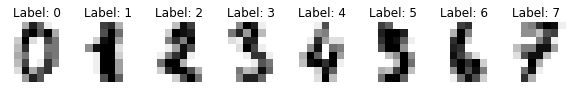

In [2]:
digits = datasets.load_digits()

def drawDataSet(X, y):
    _, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Label: %i" % label)
        
print(f'Data shape: {digits.images.shape}, Target shape: {digits.target.shape}')
drawDataSet(digits.images, digits.target)

### Transformando los datos

In [3]:
X , y = digits.images, digits.target

X = X.reshape((-1,64))
print(X.shape)

X /= 255.0

(1797, 64)


### Particionado de datos

X_train shape: (1347, 64), X_test shape: (450, 64)


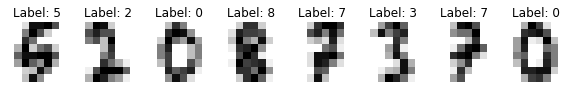

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
drawDataSet(X_train.reshape((-1,8,8)), y_train)